# Unsupervised Learning with K-Means Notebook - Spotify Data

### About the dataset:

The data for this notebook was collected on April 26th 2018 using the python library [Spotipy](https://spotipy.readthedocs.io/en/latest/) which is utlizing the [official Spotify Web API](https://beta.developer.spotify.com/documentation/web-api/).
The dataset contains a number of audio features for a total of 93690 unique tracks from Spotify. There is a [separate notebook](https://github.com/tgel0/tgel0.github.io/blob/master/Notebooks/SpotifyDataNotebook.ipynb) showing the data collection part.

### About this notebook:

This notebook is divided into the following parts:

#### 1. EDA
#### 1.1 Common methods
Exploring the data with common methods from the pandas library.
#### 1.2 Analysis of each feature
Additional analysis for each feature from the dataset.
#### 2. Machine Learning
#### 2.1 K-Means
Clustering with the K-Means algorithm.
#### 2.2 PCA
Visualizing the clusters after applying PCA.

### Goal of the notebook:

The goal is to explore the data collected from the Spotify API and experiment with unsupervised machine learning algorythms using the python library scikit-learn.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. EDA

Exploratory data analysis.

In [2]:
# reading the .csv file into a datframe

df = pd.read_csv('SpotifyAudioFeatures260042018.csv',index_col=0)
df.head()

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Drake,97,2XW4DbS6NddZxRPm5rMCeY,God's Plan,0.02440,0.753,198960,0.454,0.000056,7,0.498,-9.488,1,0.0963,77.170,4,0.344
1,Drake,99,1cTZMwcBJT0Ka3UJPXOeeN,Nice For What,0.09340,0.567,210926,0.913,0.000124,8,0.114,-6.471,1,0.0736,93.350,4,0.792
2,Post Malone,95,65NwOZqoXny4JxqAPlfxRF,Psycho (feat. Ty Dolla $ign),0.56600,0.740,220880,0.558,0.000000,8,0.112,-8.115,1,0.1020,140.057,4,0.421
3,BlocBoy JB,98,4qKcDkK6siZ7Jp1Jb4m0aL,Look Alive (feat. Drake),0.00104,0.922,181263,0.581,0.000059,10,0.105,-7.495,1,0.2700,140.022,4,0.595
4,XXXTENTACION,97,3ee8Jmje8o58CHK66QrVC2,SAD!,0.25800,0.740,166606,0.613,0.003720,8,0.123,-4.880,1,0.1450,75.023,4,0.473


In [3]:
df.shape

(93690, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93690 entries, 0 to 93689
Data columns (total 17 columns):
artist_name         93690 non-null object
popularity          93690 non-null int64
track_id            93690 non-null object
track_name          93690 non-null object
acousticness        93690 non-null float64
danceability        93690 non-null float64
duration_ms         93690 non-null int64
energy              93690 non-null float64
instrumentalness    93690 non-null float64
key                 93690 non-null int64
liveness            93690 non-null float64
loudness            93690 non-null float64
mode                93690 non-null int64
speechiness         93690 non-null float64
tempo               93690 non-null float64
time_signature      93690 non-null int64
valence             93690 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 12.9+ MB


In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,93690.000000,93690.000000,93690.000000,9.369000e+04,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000
mean,30.482463,0.324905,0.586431,2.136447e+05,0.580781,0.230713,5.242758,0.192953,-9.779976,0.604141,0.112959,119.995312,3.886914,0.438479
std,13.500031,0.334599,0.187380,1.260517e+05,0.253634,0.362988,3.605844,0.165570,6.331046,0.489037,0.125132,30.133499,0.503241,0.260862
min,0.000000,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.028300,0.470000,1.662170e+05,0.415000,0.000000,2.000000,0.097200,-11.626000,0.000000,0.038800,97.000000,4.000000,0.222000
50%,29.000000,0.188000,0.611000,2.028655e+05,0.611000,0.000214,5.000000,0.123000,-7.982000,1.000000,0.056400,120.043000,4.000000,0.419000
75%,38.000000,0.591000,0.728000,2.410832e+05,0.781000,0.498000,8.000000,0.233000,-5.729000,1.000000,0.131000,139.914000,4.000000,0.637000
max,100.000000,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.996000,1.806000,1.000000,0.964000,249.983000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7be4249e8>,
      dtype=object)

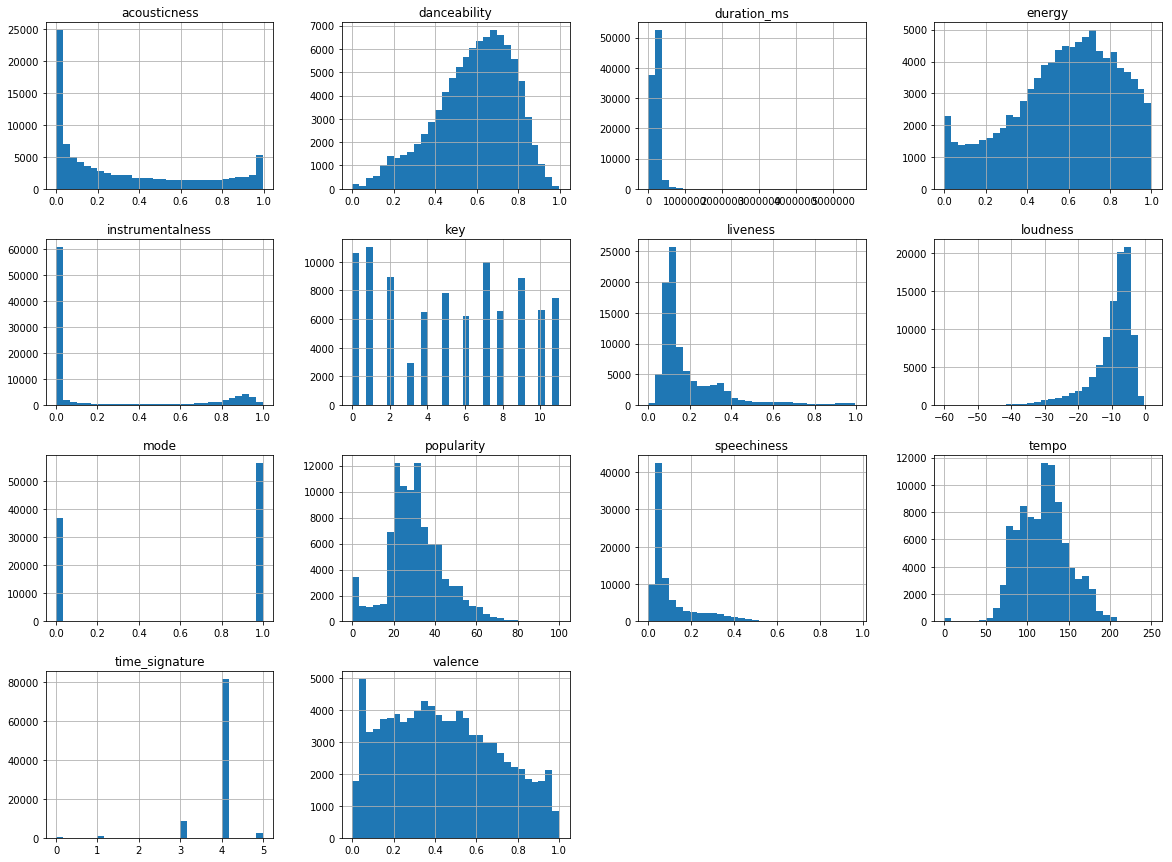

In [6]:
df.hist(bins=30, figsize=(20,15))

## 1.2 Analysis of each feature

### 1.2.1 Duration_ms
Description from the [official API docs](https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/): "The duration of the track in milliseconds."

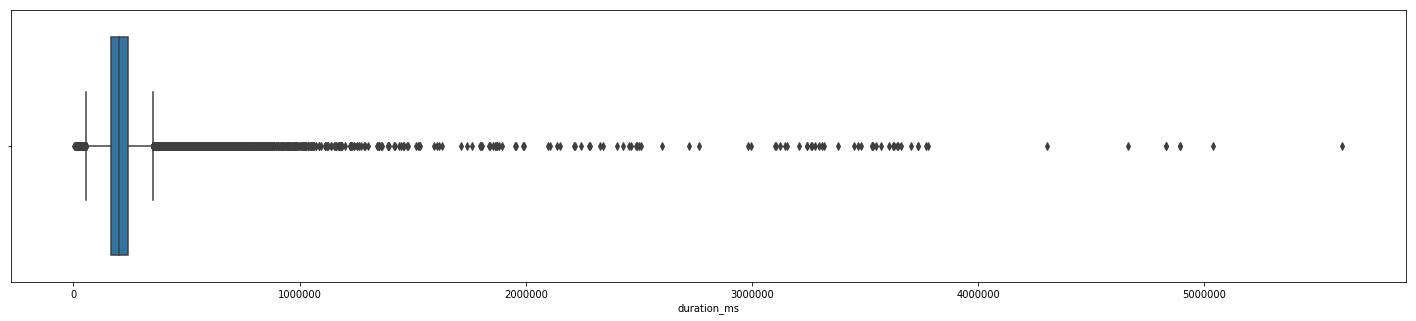

In [7]:
plt.figure(figsize=(25,5))
sns.boxplot(x='duration_ms', data=df)

Boxplot and also the .describe() method earlier shows clearly that there are some outliers here.

Checking what are those extra long tracks:

In [8]:
df.loc[df['duration_ms'] > 1500000,['artist_name','track_name','duration_ms']].head()

,artist_name,track_name,duration_ms
5719,Excision,Lost Lands 2017 Mix,4830606
6377,Franz Liszt,"Sonata in B Minor, S. 178",1839520
19106,Gustav Mahler,"Symphony No. 6 in A Minor ""Tragic"": IV. Finale...",1525987
28928,Monstercat,#194 - Monstercat: Call of the Wild (Hosted by...,3627887
31420,Gentle Whispering,Fluffy Sleepy Whispers,2097245


Seems to be mostly DJ mixes and classical music symphonies.

Similarly there are some very short tracks as well (interludes etc.):

In [9]:
df.loc[df['duration_ms'] < 60000,['artist_name','track_name','duration_ms']].head()

,artist_name,track_name,duration_ms
199,XXXTENTACION,love yourself (interlude),48423
669,Breaking Benjamin,Lyra,29747
906,Tinashe,Go Easy On Me (Interlude),31040
1214,Waka Flocka Flame,Interlude (feat. Slim Dunkin),46560
1252,Waka Flocka Flame,Tune-Up Man Skit (feat. Slim Dunkin),14616


### 1.2.2 Acousticness

Description from the official API docs: "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."

#### Function for example tracks

Since a lot of features are provided in this 0 to 1 confidence measure format I will create 2 functions to get some example tracks for those feature more easily.

In [10]:
def high_confidence_examples (feature):
    """Return 5 example tracks with a very strong confidence for the feature in question (> 0.95), sorted by popularity """
    
    examples = df.loc[df[feature] > 0.95,['artist_name','track_name',feature,'popularity']].sort_values('popularity', ascending=False).head()
    
    return examples

def low_confidence_examples (feature):
    """Return 5 example tracks with a very low confidence for the feature in question (< 0.05), sorted by popularity """
    
    examples = df.loc[df[feature] < 0.05,['artist_name','track_name',feature,'popularity']].sort_values('popularity', ascending=False).head()
    
    return examples

In [11]:
# using the newly created function for the 'acousticness' feature

high_confidence_examples('acousticness')

,artist_name,track_name,acousticness,popularity
94,Bad Bunny,Amorfoda,0.983,93
141,XXXTENTACION,before I close my eyes,0.976,80
473,Strange Imagining,Magnetic,0.991,72
869,Arden Forest,Coral Red,0.993,70
805,The Daydream Club,For the Lost Ones,0.994,70


In [12]:
low_confidence_examples('acousticness')

,artist_name,track_name,acousticness,popularity
40,Nicky Jam,X,0.03640,99
3,BlocBoy JB,Look Alive (feat. Drake),0.00104,98
0,Drake,God's Plan,0.02440,97
34,Calvin Harris,One Kiss (with Dua Lipa),0.03700,96
49,David Guetta,Like I Do,0.00664,94


### 1.2.3 Danceability
Description from the official API docs: "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

In [13]:
high_confidence_examples('danceability')

,artist_name,track_name,danceability,popularity
54,Cardi B,Drip (feat. Migos),0.968,86
88,Ty Dolla $ign,Pineapple (feat. Gucci Mane & Quavo),0.964,83
204,Lil Yachty,BABY DADDY,0.972,76
230,Slim Jxmmi,Chanel (feat. Swae Lee & Pharrell),0.980,76
14217,Mc Neguinho do ITR,Popotão Grandão,0.974,73


In [14]:
low_confidence_examples('danceability')

,artist_name,track_name,danceability,popularity
929,Max Richter,A Woman Alone,0.0,63
4961,Arx,Cabin Pressure,0.0,52
5550,Arx,Tranquil White Noise,0.0,51
20882,The White Noisy,Old Air Conditioner,0.0,51
15611,Neighborhood Crook,Forgien Wit Mans,0.0,43


### 1.2.4 Energy
"Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

In [15]:
high_confidence_examples('energy')

,artist_name,track_name,energy,popularity
369,j-hope,Daydream (백일몽),0.961,76
13682,IZA,Ginga (Participação especial de Rincon Sapiência),0.972,74
39119,Katja Krasavice,Dicke Lippen,0.967,70
750,Yellow Claw,Beastmode,0.973,70
1304,Steve Aoki,Mayhem,0.964,69


In [16]:
low_confidence_examples('energy')

,artist_name,track_name,energy,popularity
525,Astron,In the Clouds,0.0466,70
869,Arden Forest,Coral Red,0.0128,70
758,Per Magnusson,Erin's Waltz,0.0457,68
790,Belle Margaux,Theme from the Steps of Life,0.0049,67
1276,Tomasz Kraal,Luna From Soyuz,0.0217,67


### 1.2.5 Instrumentalness
"	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

In [17]:
high_confidence_examples('instrumentalness')

,artist_name,track_name,instrumentalness,popularity
580,Morongo,Anasazi,0.969,70
805,The Daydream Club,For the Lost Ones,0.953,70
758,Per Magnusson,Erin's Waltz,0.953,68
980,Elliot Ziegler,Lyon,0.958,68
790,Belle Margaux,Theme from the Steps of Life,0.957,67


In [18]:
low_confidence_examples('instrumentalness')

,artist_name,track_name,instrumentalness,popularity
17,Marshmello,FRIENDS,0.000000,100
40,Nicky Jam,X,0.001080,99
1,Drake,Nice For What,0.000124,99
3,BlocBoy JB,Look Alive (feat. Drake),0.000059,98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),0.000000,98


### 1.2.6 Liveness
"Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

In [19]:
high_confidence_examples('liveness')

,artist_name,track_name,liveness,popularity
29541,Ferrugem,Pra você acreditar - Ao vivo,0.965,68
31902,Ronnie Flex,WOW,0.958,64
52697,Ferrugem,Sinto sua falta - Ao vivo,0.961,62
48899,Ferrugem,O meu coração tem medo - Ao vivo,0.975,62
60812,Ferrugem,Minha namorada - Ao vivo,0.975,60


In [20]:
low_confidence_examples('liveness')

,artist_name,track_name,liveness,popularity
154,Meghan Trainor,No Excuses,0.0417,83
7006,MC Loma e As Gêmeas Lacração,Envolvimento,0.0349,77
359,R3HAB,The Wave,0.0420,77
206,Troye Sivan,My My My!,0.0440,76
191,Bazzi,Myself,0.0338,76


### 1.2.7 Speechiness
"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

In [21]:
high_confidence_examples('speechiness')

,artist_name,track_name,speechiness,popularity
85859,JóiPé,Grunnar Týpur - Interlude,0.951,46
14017,PaperMakingBoys,Loyal She A Keeper,0.954,43
16831,Andrew W.K.,The Feeling of Being Alive,0.951,40
63202,Santo Subito,Sugar Baby (Interlude),0.964,39
27817,Andrew W.K.,Confusion and Clarity,0.952,35


In [22]:
low_confidence_examples('speechiness')

,artist_name,track_name,speechiness,popularity
6,Khalid,Love Lies (with Normani),0.0449,98
8,The Weeknd,Call Out My Name,0.0369,97
46,Rudimental,"These Days (feat. Jess Glynne, Macklemore & Da...",0.0474,97
39,Camila Cabello,Havana,0.0300,96
49,David Guetta,Like I Do,0.0377,94


### 1.2.8 Valence
"	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

In [23]:
high_confidence_examples('valence')

,artist_name,track_name,valence,popularity
117,Logic,Indica Badu,0.970,81
7006,MC Loma e As Gêmeas Lacração,Envolvimento,0.965,77
19406,MC Loma e As Gêmeas Lacração,Treme Treme,0.968,71
23478,MC Loma e As Gêmeas Lacração,Paralisa,0.971,70
1002,Joss Favela,Me Hubieras Dicho,0.963,68


In [24]:
low_confidence_examples('valence')

,artist_name,track_name,valence,popularity
148,Rae Sremmurd,CLOSE (feat. Travis Scott),0.0395,77
420,Tank,When We (Remix) [feat. Ty Dolla $ign and Trey ...,0.0398,71
525,Astron,In the Clouds,0.0384,70
580,Morongo,Anasazi,0.0372,70
26063,Ufo361,Kontostand,0.0381,70


### 1.2.9 Key
"The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on."

In [25]:
df.loc[df['key'] > 10,['artist_name','track_name','key']].head()

,artist_name,track_name,key
18,Rich The Kid,Plug Walk,11
30,XXXTENTACION,changes,11
48,Dan + Shay,Tequila,11
54,Cardi B,Drip (feat. Migos),11
56,The Weeknd,Privilege,11


### 1.2.10 Loudness
"The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db."

In [26]:
df.loc[df['loudness'] > 0,['artist_name','track_name','loudness']].head()

,artist_name,track_name,loudness
9037,Duki,Rockstar,0.642
9298,Borgore,Reasons,0.038
15830,SVDDEN DEATH,Angel Style,0.034
20412,CG5,No More Cake,0.476
21728,"Steve Lieberman, The Gangsta Rabbi",The Diarrhea Song,1.750


### 1.2.11 Mode
"Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.."

In [27]:
df.loc[df['mode'] == 0,['artist_name','track_name','mode']].head()

,artist_name,track_name,mode
10,Kendrick Lamar,All The Stars (with SZA),0
11,Cardi B,I Like It,0
13,XXXTENTACION,Moonlight,0
14,Rae Sremmurd,Powerglide (feat. Juicy J),0
15,Post Malone,rockstar,0


### 1.2.12 Popularity
"The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time."

In [28]:
df.loc[:,['artist_name','track_name','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,popularity
17,Marshmello,FRIENDS,100
40,Nicky Jam,X,99
1,Drake,Nice For What,99
3,BlocBoy JB,Look Alive (feat. Drake),98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),98


In [29]:
df.loc[:,['artist_name','track_name','popularity']].sort_values('popularity').head()

,artist_name,track_name,popularity
88491,Stealth,I Don't Need Your Love - Acoustic,0
32857,Image Sounds,The Clubwork,0
32858,Image Sounds,Where Am I,0
32859,Image Sounds,Winter Sadness 2,0
32860,Image Sounds,Blaster,0


### 1.2.13 Tempo
"	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

In [30]:
df.loc[df['tempo'] == 128,['artist_name','track_name','tempo','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,tempo,popularity
36155,Christian Smith,Metamorphosis,128.0,44
40539,Chris Lorenzo,Mind Control (Never Say Never),128.0,39
22556,Matt Fax,Storm,128.0,38
19166,Ozone,Ulala,128.0,36
31597,Sunny Lax,Obsydian,128.0,36


### 1.2.14 Time signature
"An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)."

In [31]:
df.loc[df['time_signature'] == 4,['artist_name','track_name','time_signature','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,time_signature,popularity
17,Marshmello,FRIENDS,4,100
1,Drake,Nice For What,4,99
40,Nicky Jam,X,4,99
3,BlocBoy JB,Look Alive (feat. Drake),4,98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),4,98


## 2. Machine Learning

### 2.1 K-Means

According to the [official scikit-learn docs](http://scikit-learn.org/stable/modules/clustering.html#k-means) "K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields."

#### A few points about K-Means/ unsupervised learning

- in this example, K-Means clustering will be used to simply identify clusters of unlabeled data. In this sense, it can be seen as an (advanced) part of the EDA process rather than an actual prediction algorithm.
- also this means that the usual train/test data split usually involved with ML will be skipped as the fitted model will not be deployed on unseen data etc.
- since K-Means depends on numeric data to measure variance I will drop columns which are not numeric

In [32]:
# dropping non numeric columns

non_numeric_columns= ['track_id','artist_name','track_name']

df_pred = df.drop(non_numeric_columns, axis=1)
print('Columns left are:', df_pred.columns)

Columns left are: Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


Importing libraries for K-Means.

In [33]:
from sklearn.cluster import KMeans

Creating a K-Means instance with 15 clusters (I tried out different numbers and this seems to be a good choice).

After that model fitting and predicting.

In [34]:
k_means = KMeans(n_clusters=15)

In [35]:
# adding timeit library to measure the time needed

import timeit
start = timeit.default_timer()

k_means.fit(df_pred)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 47.85296954121441


47 seconds for clustering almost 94k entries into 15 clusters seems pretty good.

Next is to predict the clusters on the dataframe.

In [36]:
y_pred = k_means.predict(df_pred)

Storing the K-Means results in a new dataframe and merging with the original dataframe.

In [37]:
pred = pd.DataFrame(y_pred)
pred.columns = ['Clusters']

In [38]:
df_with_clusters = pd.concat([df,pred], axis = 1)

Printing the shape of each cluster.

In [39]:
for i in range(0,15):
    print('Shape of cluster ', i, ":", df_with_clusters.loc[df_with_clusters['Clusters'] == i].shape)

Shape of cluster  0 : (9131, 18)
Shape of cluster  1 : (22651, 18)
Shape of cluster  2 : (36, 18)
Shape of cluster  3 : (2684, 18)
Shape of cluster  4 : (500, 18)
Shape of cluster  5 : (5593, 18)
Shape of cluster  6 : (62, 18)
Shape of cluster  7 : (11571, 18)
Shape of cluster  8 : (19855, 18)
Shape of cluster  9 : (8, 18)
Shape of cluster  10 : (15274, 18)
Shape of cluster  11 : (40, 18)
Shape of cluster  12 : (201, 18)
Shape of cluster  13 : (1256, 18)
Shape of cluster  14 : (4828, 18)


#### Function for example tracks

Similarly to the earlier function, I will create another funcion which will return 10 example tracks for the requested cluster.

In [40]:
def cluster_examples(cluster):
    """ Return 10 example tracks from the requested cluster (all features), sorted by popularity"""
    
    examples = df_with_clusters.loc[df_with_clusters['Clusters'] == cluster].sort_values('popularity', ascending=False).head(10)
    
    return examples

In [42]:
# using the first function for cluster 0

cluster_examples(0)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
13,XXXTENTACION,93,0JP9xo3adEtGSdUEISiszL,Moonlight,0.5560,0.921,135090,0.537,0.004040,9,0.1020,-5.723,0,0.0804,128.009,4,0.711,0
30,XXXTENTACION,90,7AFASza1mXqntmGtbxXprO,changes,0.8830,0.669,121887,0.308,0.000000,11,0.0984,-10.068,1,0.0290,64.934,4,0.520,0
74,Bazzi,88,7uzmGiiJyRfuViKKK3lVmR,Mine,0.0161,0.710,131064,0.789,0.000003,4,0.4510,-3.874,1,0.0722,142.929,4,0.717,0
21,J. Cole,87,1AT4xjNarTswd0UZ5FlmKF,Motiv8,0.1350,0.869,133922,0.385,0.000000,4,0.0931,-7.801,1,0.2970,149.897,4,0.596,0
31,YBN Nahmir,87,5lZsh9Qf7CbHI9Fcc7Zcsq,Bounce Out With That,0.0370,0.865,97202,0.652,0.000000,8,0.0925,-8.218,1,0.1050,94.946,4,0.372,0
61,YoungBoy Never Broke Again,84,5Qx9hngUBr30JFrNua7yp4,Outside Today,0.2600,0.838,128908,0.676,0.000000,11,0.1050,-5.521,0,0.0682,134.054,4,0.146,0
79,XXXTENTACION,84,2ZRo7axmMPeSVUvDbGkJah,Hope,0.6610,0.592,110886,0.457,0.000331,9,0.1460,-6.081,0,0.0603,146.040,4,0.225,0
83,XXXTENTACION,84,7CkbRn6S0itJqcqn88AtSV,going down!,0.0216,0.873,115194,0.663,0.000356,1,0.0867,-4.086,1,0.1500,135.499,4,0.525,0
45,J. Cole,82,52Hq1nvCDDZ17dhgGWLnCI,Intro,0.8110,0.512,107161,0.280,0.000075,8,0.0870,-16.708,0,0.0441,111.446,3,0.545,0
104,XXXTENTACION,82,65u1dHQyQyE4y4aN2eDmMF,$$$ - with Matt Ox,0.0636,0.774,130403,0.507,0.000000,1,0.1380,-6.952,0,0.0650,140.067,4,0.508,0


In [44]:
# cluster 1

cluster_examples(1)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
17,Marshmello,100,08bNPGLD8AhKpnnERrAc6G,FRIENDS,0.20500,0.626,202621,0.880,0.000000,9,0.1280,-2.384,0,0.0504,95.079,4,0.534,1
3,BlocBoy JB,98,4qKcDkK6siZ7Jp1Jb4m0aL,Look Alive (feat. Drake),0.00104,0.922,181263,0.581,0.000059,10,0.1050,-7.495,1,0.2700,140.022,4,0.595,1
6,Khalid,98,45Egmo7icyopuzJN0oMEdk,Love Lies (with Normani),0.09560,0.708,201707,0.648,0.000000,6,0.1340,-5.626,1,0.0449,143.955,4,0.338,1
0,Drake,97,2XW4DbS6NddZxRPm5rMCeY,God's Plan,0.02440,0.753,198960,0.454,0.000056,7,0.4980,-9.488,1,0.0963,77.170,4,0.344,1
49,David Guetta,94,6RnkFd8Fqqgk1Uni8RgqCQ,Like I Do,0.00664,0.635,202500,0.900,0.014500,0,0.3700,-3.719,0,0.0377,127.978,4,0.150,1
41,Ariana Grande,93,5SxkdsY1ufZzoq9iXceLw9,No Tears Left To Cry,0.03750,0.703,205947,0.696,0.000006,0,0.2740,-5.482,1,0.0529,121.969,4,0.366,1
106,Sofia Reyes,93,4QtiVmuA88tPQiCOHZuQ5b,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",0.16500,0.792,201526,0.895,0.000000,1,0.0501,-3.112,0,0.0589,94.968,4,0.794,1
9,Zedd,91,09IStsImFySgyp0pIQdqAc,The Middle,0.19800,0.745,184732,0.652,0.000000,7,0.1330,-3.099,1,0.0604,106.809,4,0.409,1
112,David Guetta,91,33IOhptvC2Qoy2UhjiHXLV,Flames,0.07230,0.609,195000,0.726,0.000008,5,0.0895,-4.346,0,0.0414,93.958,4,0.362,1
12,Migos,89,2UVbBKQOdFAekPTRsnkzcf,Stir Fry,0.00299,0.815,190288,0.816,0.000000,2,0.1590,-5.474,1,0.2690,181.967,4,0.498,1


In [46]:
cluster_examples(2)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
54754,J COSIO,43,7lQmFKF9sSsr8tUAQQFDc6,Mix Reggaeton 2018,0.05440,0.528,3262657,0.778,0.000003,1,0.3320,-5.499,1,0.0920,94.752,4,0.591,2
85442,DJ Luigi,43,0rzz2JHEMKeoKr0rMGV1a6,Reggaeton Karmoso 12,0.09080,0.495,3777432,0.818,0.000000,1,0.0770,-4.630,1,0.0720,94.463,4,0.683,2
73508,DJ Klaus Hidalgo,40,6VV5E4ZUeZmDJ2Oi4YjL8e,Reggaeton Old School,0.04950,0.590,3206147,0.838,0.000009,2,0.0501,-5.771,1,0.0565,94.633,4,0.708,2
42201,Monstercat,33,7MZVYFy6nSNPZUdLYTTdVR,#193 - Monstercat: Call of the Wild,0.00708,0.466,3604173,0.890,0.007240,11,0.8970,-3.288,0,0.1100,112.083,4,0.264,2
42558,Monstercat,33,56PswuVaG8QREIi4xxsHKG,#192 - Monstercat: Call of the Wild,0.01160,0.456,3532867,0.823,0.040800,6,0.5360,-4.622,0,0.0608,127.949,4,0.347,2
28928,Monstercat,32,66hv7YUiFEnWxgIY7Vg9aj,#194 - Monstercat: Call of the Wild (Hosted by...,0.00891,0.305,3627887,0.847,0.002070,5,0.3720,-4.056,0,0.1540,174.016,4,0.246,2
44775,Monstercat,32,6tsawIqSAIBCNJjhv87Xoj,#191 - Monstercat: Call of the Wild,0.01110,0.486,3529617,0.844,0.003910,11,0.3810,-4.329,0,0.1300,128.392,4,0.319,2
48970,Monstercat,31,2klI8AjQ7LiV92q9bCsxnZ,#190 - Monstercat: Call of the Wild,0.00889,0.454,3550620,0.871,0.013300,6,0.3590,-4.229,1,0.1000,130.325,4,0.322,2
90322,Franco Escamilla,29,62qErKv28nAnYFkl4tYwLp,Sabes Que La Cagaste,0.81300,0.663,3102933,0.454,0.000000,0,0.6070,-7.065,1,0.6460,94.287,3,0.632,2
85502,Franco Escamilla,29,4NGkm1PXIOicjzILSrkUHl,24 de Abril Honorio y Compañía (En Vivo),0.77000,0.679,3155986,0.697,0.000000,9,0.2420,-5.737,1,0.6710,81.854,4,0.778,2


In [48]:
cluster_examples(3)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
211,Nio Garcia,86,3V8UKqhEK5zBkBb6d6ub8i,Te Boté - Remix,0.5420,0.903,417920,0.675,0.000013,11,0.0595,-3.445,0,0.2140,96.507,4,0.442,3
2448,Ex Battalion,75,7MrDfa1uQGVXx0JMZ2u5tN,Hayaan Mo Sila,0.7100,0.708,367229,0.704,0.000000,5,0.0660,-4.747,1,0.0624,80.018,4,0.710,3
1492,Yandel,69,65n40RsQ9SObH7hNvVTHp0,Explícale - Remix,0.0885,0.774,395667,0.682,0.000000,1,0.0963,-4.099,1,0.1260,125.026,4,0.587,3
1318,Florence + The Machine,66,69sJBJdGogAYV74hmB0ORK,Tiny Dancer,0.2770,0.532,361188,0.537,0.000008,0,0.1910,-6.889,1,0.0291,139.997,4,0.154,3
1759,Ben Howard,66,7ggEZxgHmtHBzmzO8gIcuc,A Boat To An Island On The Wall,0.4660,0.486,430307,0.495,0.821000,5,0.1060,-9.056,1,0.0385,146.311,4,0.326,3
1514,El Alfa,66,7xgRU6IXWSXaOgMeufGtVa,Lo Que Yo Diga (Dema Ga Ge Gi Go Gu Remix),0.1230,0.720,389489,0.719,0.000001,7,0.0972,-5.144,1,0.1160,174.932,4,0.423,3
831,A Perfect Circle,65,1O9DWF3578RHMxZg2nLPeM,Disillusioned,0.1550,0.227,353708,0.634,0.000290,5,0.3450,-6.347,1,0.0400,81.918,4,0.152,3
3231,Ñejo,64,4ZtSifmVEda37YUYnnHz1y,Se Te Hizo Tarde,0.3190,0.698,358765,0.801,0.000000,10,0.3160,-5.746,0,0.0639,169.995,4,0.905,3
2168,Tom Misch,64,6pxElwU80zhjbCC77Vn8EI,Movie,0.3910,0.785,357357,0.379,0.016100,7,0.2670,-11.446,1,0.0732,122.043,3,0.182,3
8062,Ex Battalion,63,1CfysrFGAItkEGBZwaidl1,SouthBoys,0.0365,0.769,358776,0.648,0.000000,0,0.1090,-6.286,1,0.0454,94.962,4,0.657,3


In [50]:
cluster_examples(4)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
1268,The Belonging Co,62,0AiQLGevpr9XOc9kIRjyuB,Isn't He (This Jesus) [feat. Natalie Grant],0.118000,0.224,590437,0.467,0.000000,8,0.0881,-7.287,1,0.0321,144.012,4,0.0622,4
4516,Kamasi Washington,57,1Etl6q0mmPV60TtOCD0uch,Fists of Fury,0.284000,0.400,583174,0.889,0.780000,3,0.0885,-8.315,0,0.1000,103.528,4,0.5530,4
3988,Sleep,54,2r96d3NHOdSGabfzwefeZ8,Sonic Titan,0.001120,0.192,746533,0.735,0.787000,5,0.2210,-8.816,1,0.0442,111.174,4,0.3480,4
13708,DJ Nelson,52,27UXlP42ulJiZ4zXfphR7A,"Micro Mixx, Vol. 9",0.008040,0.853,598867,0.838,0.000005,1,0.1330,-4.363,1,0.1570,106.000,4,0.7030,4
87132,fhop music,52,7BeR3jQiQ7mWOcF4agTtc3,Ousado Amor,0.267000,0.318,594395,0.547,0.000121,7,0.1770,-8.580,0,0.0430,110.846,4,0.0908,4
5419,Deafheaven,52,5rm8qWqgvsTMDlREekSiCw,Honeycomb,0.000031,0.225,664440,0.962,0.790000,2,0.1060,-5.214,1,0.1050,142.621,4,0.1140,4
13120,Nils Frahm,51,2z0ZyNzn5XNupSi8pwpHfy,All Melody,0.862000,0.688,570693,0.617,0.945000,10,0.1500,-16.124,0,0.2000,202.040,3,0.7290,4
5102,Sleep,51,3i2nKviYJ8clet6psnfHV0,Giza Butler,0.003220,0.238,602493,0.773,0.414000,5,0.1040,-8.843,1,0.0460,138.538,4,0.2550,4
13434,Nils Frahm,50,4NtnTsCqTWNK2tdnq0aVEJ,#2,0.500000,0.608,580016,0.442,0.870000,10,0.0955,-17.916,0,0.0434,101.005,3,0.2720,4
5985,TesseracT,50,0pfuQHU0YfhmaHJ99W9lDb,Beneath My Skin / Mirror Image,0.038200,0.337,681000,0.598,0.112000,10,0.1090,-8.504,0,0.0446,121.929,4,0.1400,4


In [52]:
cluster_examples(5)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
14,Rae Sremmurd,89,2yUbCEiaolfSMluDo9RMmG,Powerglide (feat. Juicy J),0.0149,0.712,332301,0.829,0.000000,1,0.1220,-4.707,0,0.1410,173.953,4,0.593,5
121,Ozuna,89,7rwX0O3RlxqqIjQM8evm5E,Solita,0.0564,0.807,311726,0.633,0.000000,10,0.1070,-6.016,0,0.0929,138.038,4,0.325,5
28,J. Cole,85,5sWbwccBcyHsg5LEKWGZo9,BRACKETS,0.1900,0.675,315771,0.567,0.000002,10,0.1750,-9.147,0,0.2630,84.039,4,0.658,5
326,Khea,85,2CRbiMK0W14l71SpDKqKZM,Loca Remix,0.3370,0.795,346460,0.751,0.000000,8,0.0983,-3.661,1,0.0675,113.033,4,0.537,5
50,Migos,84,4wFjTWCunQFKtukqrNijEt,MotorSport,0.0338,0.896,303077,0.515,0.000000,2,0.3170,-5.395,1,0.1830,138.016,4,0.174,5
1698,IV Of Spades,79,4u8RkgV6P4TLi89SmlUtv8,Mundo,0.1760,0.705,349713,0.401,0.000009,6,0.0735,-8.900,1,0.0376,140.031,4,0.481,5
169,Cory Asbury,77,0rH0mprtecH3grD9HFM5AD,Reckless Love,0.0291,0.572,333386,0.685,0.000000,6,0.0963,-7.290,1,0.0356,110.698,4,0.232,5
464,BTS,75,1OqDvYVDhJyFZny7XlfIyZ,Let Go,0.1700,0.558,299707,0.863,0.000000,4,0.2890,-3.530,1,0.1780,173.908,4,0.388,5
279,Migos,72,7yt6eiZQCkVFEzwGp4Pbor,Supastars,0.2500,0.781,293138,0.676,0.000000,1,0.0783,-4.387,1,0.0596,75.944,4,0.328,5
312,Tory Lanez,72,2MyCT1iCuBUhcO8zbjOyRW,Dance For Me (feat. NAV),0.0101,0.701,325853,0.535,0.000000,8,0.1270,-9.517,0,0.2100,79.991,4,0.143,5


In [54]:
cluster_examples(6)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
73399,Dj Linda,39,74ssJeb9d2hq9peSpJEClf,Mix Clásicos del Reggaeton 02 - Mixsets,0.0686,0.744,1238744,0.9020,0.0000,10,0.1250,-4.023,0,0.0689,94.943,4,0.7960,6
51280,Franco Escamilla,38,7g7BZr6ufZ3bmPdVunRsLu,Han Solo,0.6960,0.487,1240172,0.5270,0.0000,7,0.8520,-20.037,1,0.9350,81.798,3,0.1060,6
52696,Franco Escamilla,37,5PJFHnCaV564AMekNKVRWe,Jason,0.7180,0.536,1184750,0.5890,0.0000,6,0.8300,-19.533,0,0.9200,104.782,3,0.0468,6
56504,Franco Escamilla,36,5GbaZlr2h0POgk78amMemK,Final,0.6360,0.435,1360359,0.5610,0.0000,9,0.9760,-17.271,1,0.9220,61.614,4,0.1080,6
21619,Nightwish,34,4IulwSXqZFvnpM4tbmvjbN,The Greatest Show On Earth - Remastered,0.0247,0.237,1439002,0.6270,0.0179,0,0.1740,-11.445,1,0.0588,136.010,4,0.0725,6
58675,Pyotr Ilyich Tchaikovsky,32,151CMaQIBTLTxYDh7usqnw,"Violin Concerto in D Major, Op. 35: I. Allegro...",0.9480,0.232,1158036,0.1090,0.1320,2,0.0668,-19.627,1,0.0574,58.095,4,0.0933,6
49847,Beats Bunny,32,3baEUla5v1uHmtLbMJjMgc,No Te Hagas - Vuelve - Pa' Ti - Ahora Me Llama...,0.4380,0.544,1137972,0.6380,0.0000,1,0.3720,-6.657,1,0.2090,129.802,4,0.4140,6
52286,Ludwig van Beethoven,32,6VO2DAzn6uanQQ3Dry4gNH,"Violin Concerto in D Major, Op. 61: I. Allegro...",0.6090,0.224,1423173,0.1060,0.1940,7,0.1580,-21.610,1,0.0392,96.033,4,0.0615,6
53854,Ludwig van Beethoven,30,2JfZ3XEWosX7Et7RN2dpPb,"Cello Sonata No. 2 in G Minor, Op. 5/2: I. Ada...",0.9890,0.394,1160540,0.1160,0.8880,0,0.0973,-20.217,0,0.0411,109.098,4,0.1220,6
69931,Dmitri Shostakovich,29,5mhbpN9LnbTGe0ShNCUHIR,"Symphony No. 7 in C Major, Op. 60 ""Leningrad"":...",0.7900,0.229,1480307,0.0908,0.6500,0,0.1170,-19.614,0,0.0357,143.062,4,0.1080,6


In [56]:
cluster_examples(7)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
11,Cardi B,95,58q2HKrzhC3ozto2nDdN4z,I Like It,0.0990,0.816,253390,0.726,0.0,5,0.3720,-3.998,0,0.1290,136.048,4,0.650,7
7,Migos,91,6n4U3TlzUGhdSFbUUhTvLP,Walk It Talk It,0.0739,0.909,276147,0.628,0.0,2,0.1080,-5.456,1,0.2010,145.905,4,0.406,7
122,Ozuna,88,7uYgVgRSgqluZclLS7wpp4,El Farsante - Remix,0.2180,0.737,258000,0.742,0.0,6,0.3160,-2.875,1,0.0441,119.966,4,0.386,7
275,Zion & Lennox,88,0VKkyBKCXyR99navhVRqcP,La Player (Bandolera),0.1600,0.769,249609,0.838,0.0,2,0.0935,-5.238,1,0.0633,93.996,4,0.602,7
54,Cardi B,86,2qcG0nZ6S3zZV0UrkY5nFo,Drip (feat. Migos),0.0511,0.968,262308,0.589,0.0,11,0.0731,-7.808,1,0.2550,129.993,4,0.268,7
44,Migos,85,0wbnC9AUenxp613TYaJsGK,Narcos,0.0146,0.936,255379,0.588,0.0,7,0.1390,-6.948,0,0.1360,124.987,4,0.238,7
33,J. Cole,84,5Lgqu1th1KqlG97OF2gWGe,Window Pain - Outro,0.0607,0.720,286730,0.626,0.0,8,0.0728,-9.351,1,0.3970,75.032,4,0.182,7
35,J. Cole,84,6onwlDmIVKE8bBgyBRSuS0,FRIENDS (feat. kiLL edward),0.1020,0.716,257646,0.652,0.0,6,0.1100,-7.909,0,0.3980,109.295,5,0.494,7
63,Cardi B,84,00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),0.2870,0.620,284856,0.625,0.0,9,0.3140,-7.438,1,0.5530,167.911,4,0.665,7
341,Mau y Ricky,84,6kOHug1s9Nd5gsHrX8irs2,Mi Mala - Remix,0.0189,0.735,255600,0.652,0.0,5,0.1500,-4.426,0,0.2360,171.980,4,0.776,7


In [58]:
cluster_examples(8)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
1,Drake,99,1cTZMwcBJT0Ka3UJPXOeeN,Nice For What,0.0934,0.567,210926,0.913,0.000124,8,0.1140,-6.471,1,0.0736,93.350,4,0.792,8
5,Lil Dicky,98,10Igtw8bSDyyFs7KIsKngZ,Freaky Friday (feat. Chris Brown),0.1470,0.755,216632,0.599,0.000000,8,0.1090,-5.042,1,0.2240,133.123,4,0.755,8
8,The Weeknd,97,4MPTj8lMMvxLwT3EwuXFop,Call Out My Name,0.2110,0.449,228373,0.599,0.000000,1,0.3270,-4.892,1,0.0369,134.144,3,0.165,8
46,Rudimental,97,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...",0.1940,0.653,210773,0.809,0.000000,0,0.1650,-4.057,1,0.0474,92.213,4,0.550,8
39,Camila Cabello,96,1rfofaqEpACxVEHIZBJe6W,Havana,0.1840,0.765,217307,0.523,0.000036,2,0.1320,-4.333,1,0.0300,104.988,4,0.394,8
34,Calvin Harris,96,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),0.0370,0.791,214847,0.862,0.000022,9,0.0814,-3.240,0,0.1100,123.994,4,0.592,8
2,Post Malone,95,65NwOZqoXny4JxqAPlfxRF,Psycho (feat. Ty Dolla $ign),0.5660,0.740,220880,0.558,0.000000,8,0.1120,-8.115,1,0.1020,140.057,4,0.421,8
115,Reik,95,6jA8JUuPCGYjFcgw0AoM5T,Me Niego,0.0543,0.777,221653,0.779,0.000000,0,0.6360,-4.449,0,0.0972,94.023,4,0.768,8
26,Shawn Mendes,95,79jX8RM5CgPqDKdGEKNW9K,In My Blood,0.0524,0.628,211600,0.715,0.000000,5,0.1190,-7.097,1,0.0541,139.991,4,0.429,8
19,The Weeknd,92,72TyiiduRmczEbDIEtKQdR,Wasted Times,0.6220,0.562,220293,0.674,0.000020,10,0.1110,-6.049,0,0.0851,122.699,4,0.293,8


## 2.2 PCA

In order to visualize the clusters easier I will use Principal component analysis (PCA) to reduce the dimensionality of the data to 2 dimensions/ components.

Importing libraries:

In [72]:
from sklearn.decomposition import PCA

Creating the instance with 2 components followed by model fitting.

In [73]:
pca = PCA(n_components=2)

In [74]:
principalComponents = pca.fit_transform(df_pred)

Similarly to earlier, I will store the results in a new dataframe and merge with the original dataframe.

In [75]:
pca_fit = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [76]:
df_with_pca = pd.concat([pca_fit, df_with_clusters], axis = 1)

Now I can visualize the clusters on a scatter plot:

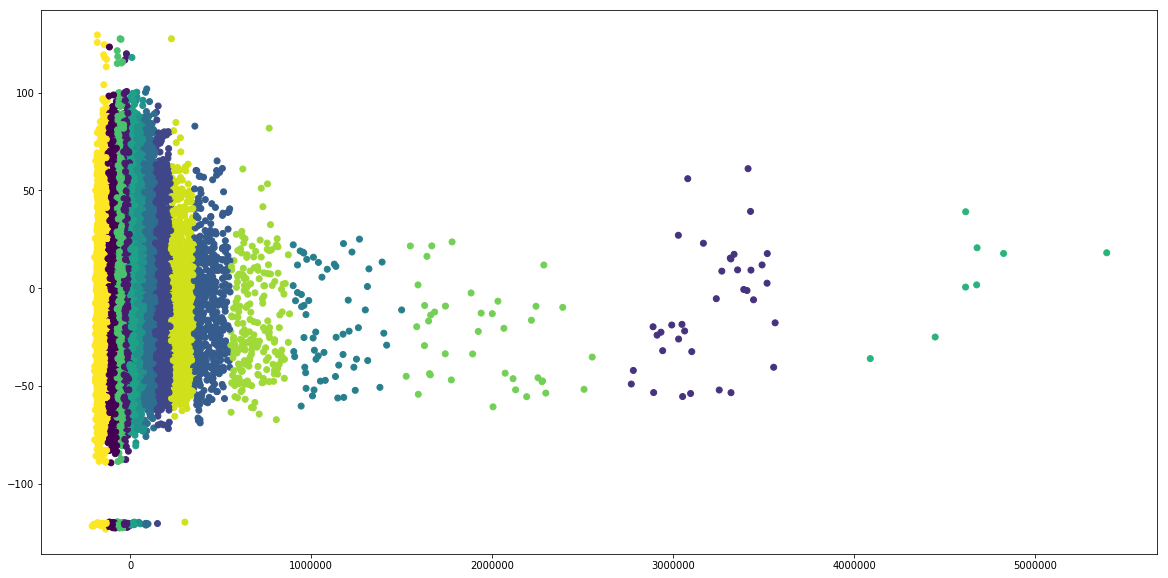

In [77]:
plt.figure(figsize=(20,10))
plt.scatter(x="principal component 1",y="principal component 2",data=df_with_pca,c=df_with_pca['Clusters'])